In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.simplefilter("ignore")

In [11]:
from pandas import read_csv


In [12]:
path = r"pima-indians-diabetes.csv"
names=['preg','glucose','BP','skin','insulin','BMI','diapegfunc','age','class']
data = read_csv(path,names=names)

In [21]:
data

,preg,glucose,BP,skin,insulin,BMI,diapegfunc,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


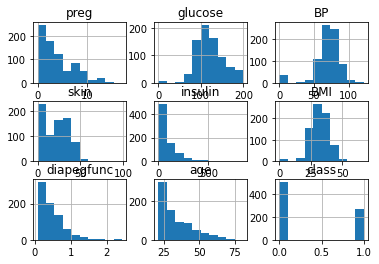

In [13]:
data.hist()
pyplot.show()

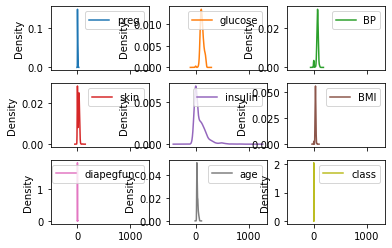

In [14]:
data.plot(kind='density', subplots=True, layout=(3,3))
pyplot.show()

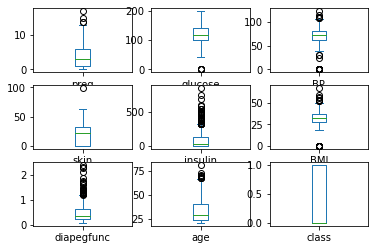

In [15]:
data.plot(kind='box', subplots=True, layout=(3,3))
pyplot.show()

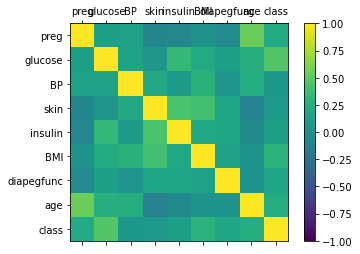

In [16]:
correlations = data.corr()

fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

[]

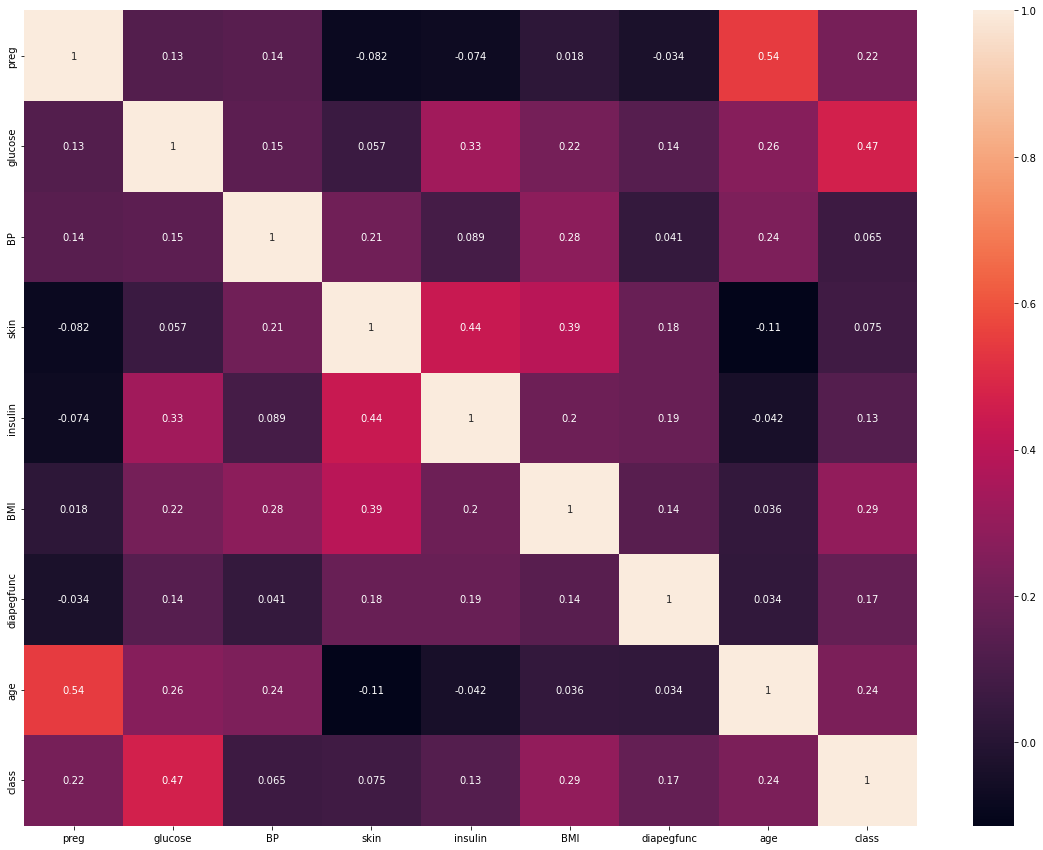

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.plot()

<AxesSubplot:xlabel='BMI', ylabel='age'>

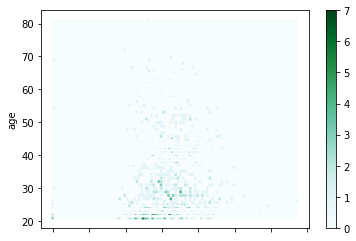

In [22]:
data.plot.hexbin(x="BMI",y="age")


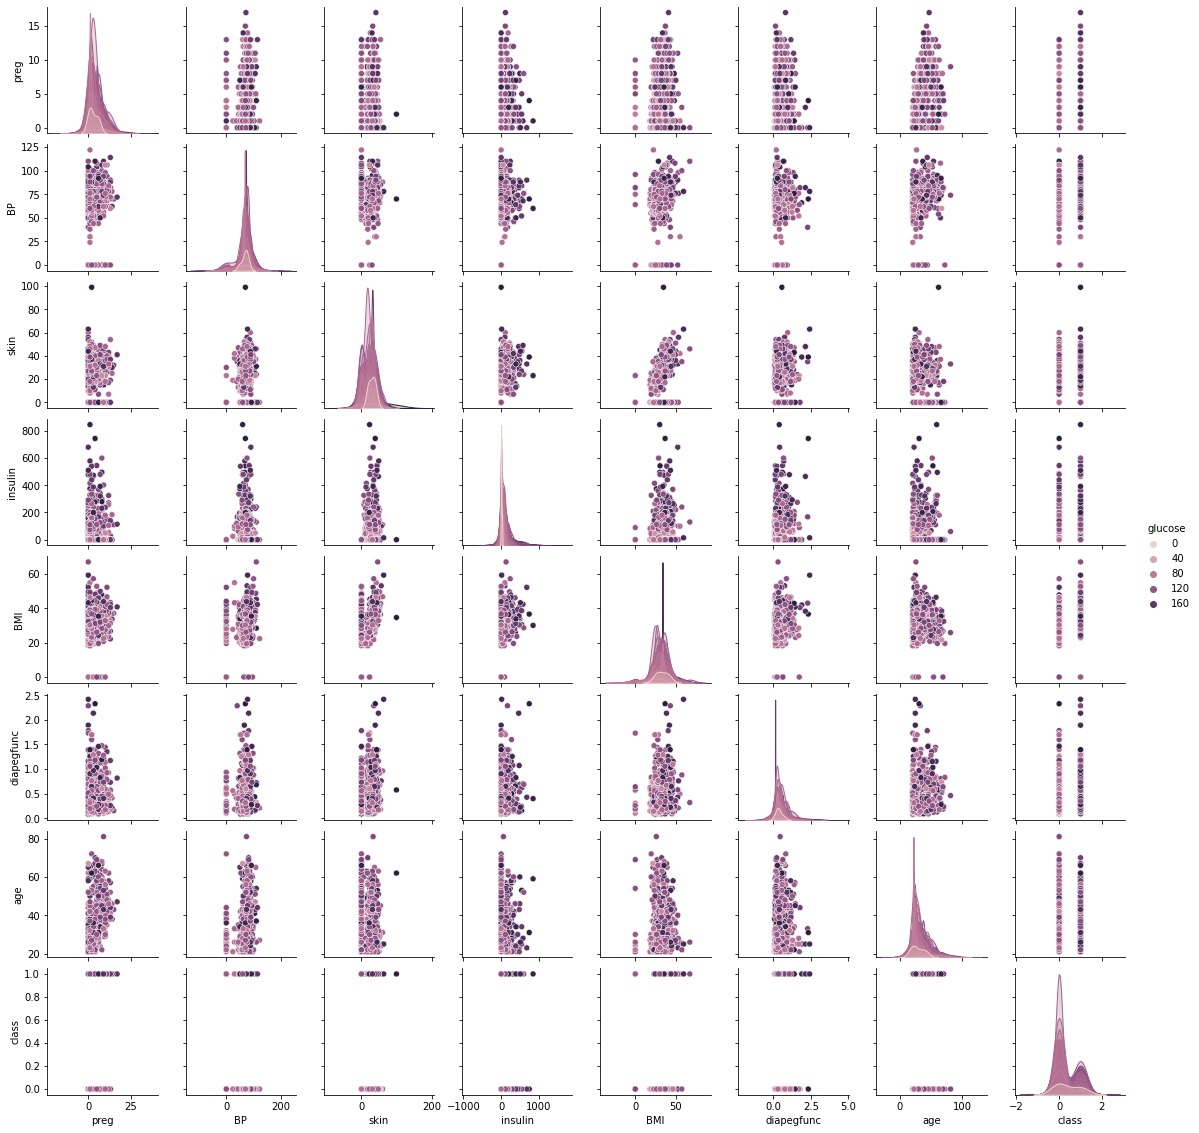

In [23]:
sns.pairplot(data,hue='glucose', height=2)

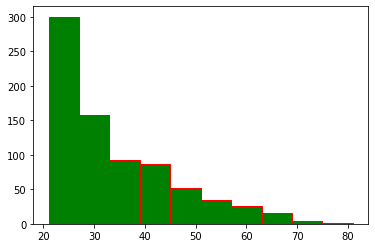

In [29]:
plt.hist(data["age"],color ='g',edgecolor='r')
plt.show()


<AxesSubplot:ylabel='class'>

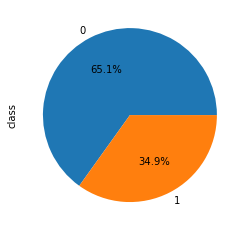

In [28]:
data["class"].value_counts().plot(kind="pie",autopct='%.1f%%')

In [30]:
 y = data['class']


In [31]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [32]:
df =data.drop('class', axis=1)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(df ,y , test_size=0.2 , random_state =42)


In [34]:
print(x_train.shape, y_train.shape )


(614, 8) (614,)


In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=42)

In [36]:
rfc.fit(x_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [37]:
y_predv =rfc.predict(x_test)


DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542)
DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)
DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1935803228)


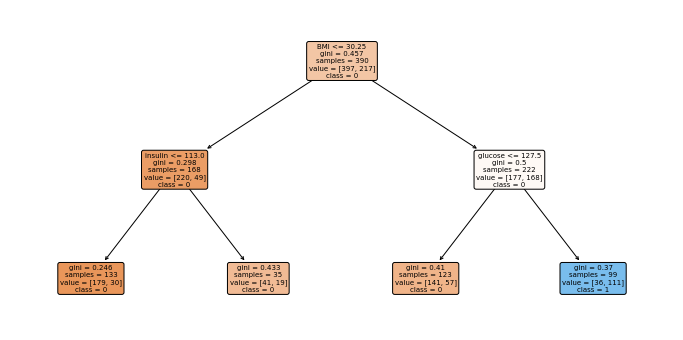

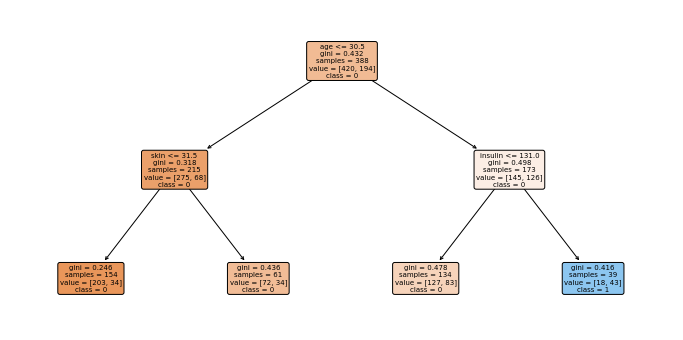

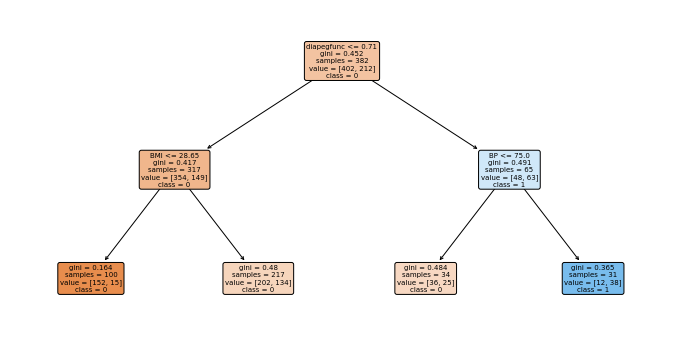

In [38]:
from sklearn import tree

feature=  df.columns.values
classes = ['0','1','2']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,feature_names=feature, class_names=classes,fontsize=7,filled=True,rounded=True)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        99
           1       0.78      0.45      0.57        55

    accuracy                           0.76       154
   macro avg       0.77      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



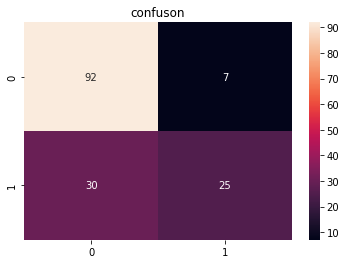

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test , y_predv)
sns.heatmap(cm,annot= True, fmt ="d").set_title("confuson")

print(classification_report(y_test, y_predv))

In [67]:
data

,preg,glucose,BP,skin,insulin,BMI,diapegfunc,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
y = data['BMI']


In [74]:
df =data.drop('BMI', axis=1)


In [75]:
x_train, x_test, y_train, y_test = train_test_split(data ,y , test_size=0.2 , random_state =42)


In [76]:
print(x_train.shape, y_train.shape )


(614, 9) (614,)


In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rfc = RandomForestRegressor(n_estimators=3, max_depth=2, random_state=42)


In [83]:
rfc.fit(x_train, y_train)


RandomForestRegressor(max_depth=2, n_estimators=3, random_state=42)

In [84]:
y_predv =rfc.predict(x_test)


DecisionTreeRegressor(max_depth=2, max_features='auto', random_state=1608637542)
DecisionTreeRegressor(max_depth=2, max_features='auto', random_state=1273642419)
DecisionTreeRegressor(max_depth=2, max_features='auto', random_state=1935803228)


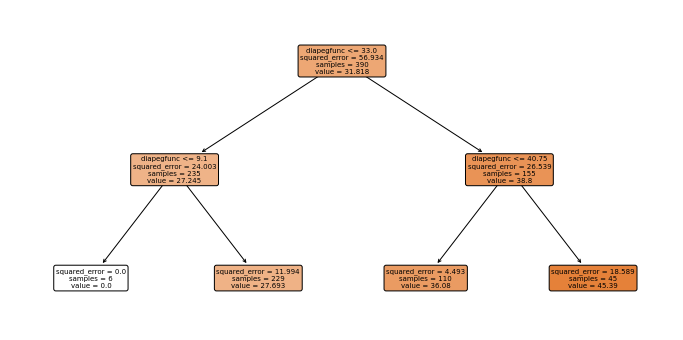

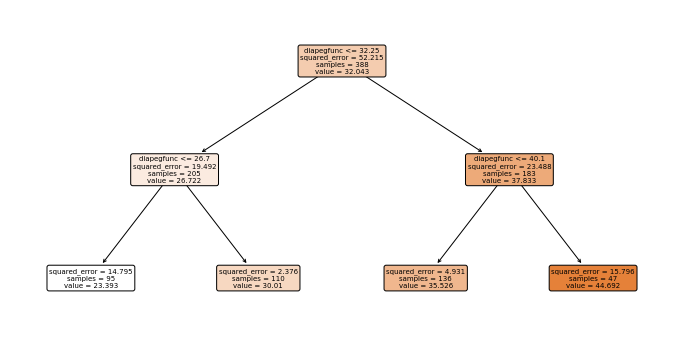

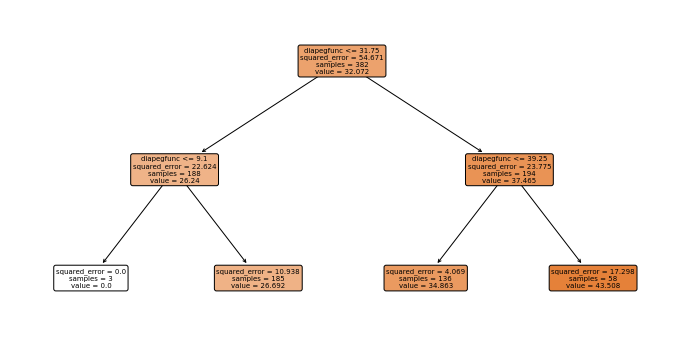

In [85]:
from sklearn import tree

feature=  df.columns.values
classes = ['0','1','2']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,feature_names=feature, class_names=classes,fontsize=7,filled=True,rounded=True)

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [87]:
print("The mean square error is",mean_squared_error(y_test, y_predv))
print("The mean absolute error is",mean_absolute_error(y_test, y_predv))

The mean square error is 7.0632015677759155
The mean absolute error is 1.925268408355722


In [88]:
print("The root mean sq error is",np.sqrt(mean_squared_error(y_test, y_predv)))


The root mean sq error is 2.657668445795283


DECISION TREE CLASSIFIER


In [90]:
y = data['class']

In [91]:
df =data.drop('class', axis=1)

In [92]:
df

,preg,glucose,BP,skin,insulin,BMI,diapegfunc,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.1, random_state=42)


In [94]:
print(X_train.shape, Y_train.shape)


(691, 8) (691,)


In [95]:
print(X_test.shape, Y_test.shape)


(77, 8) (77,)


In [96]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

In [97]:
DT.predict(X_test)
prediction = DT.predict(X_test)

In [98]:
prediction = DT.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [99]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.69      0.74      0.71        27

    accuracy                           0.79        77
   macro avg       0.77      0.78      0.78        77
weighted avg       0.80      0.79      0.79        77



In [100]:
DT.score(X_test, Y_test)

0.7922077922077922

In [101]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)  #max_depth = 3
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [102]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.95
|   |   |   |--- class: 0
|   |   |--- feature_5 >  30.95
|   |   |   |--- class: 0
|   |--- feature_7 >  28.50
|   |   |--- feature_5 <= 26.35
|   |   |   |--- class: 0
|   |   |--- feature_5 >  26.35
|   |   |   |--- class: 0
|--- feature_1 >  127.50
|   |--- feature_5 <= 29.95
|   |   |--- feature_1 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  145.50
|   |   |   |--- class: 1
|   |--- feature_5 >  29.95
|   |   |--- feature_1 <= 157.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  157.50
|   |   |   |--- class: 1



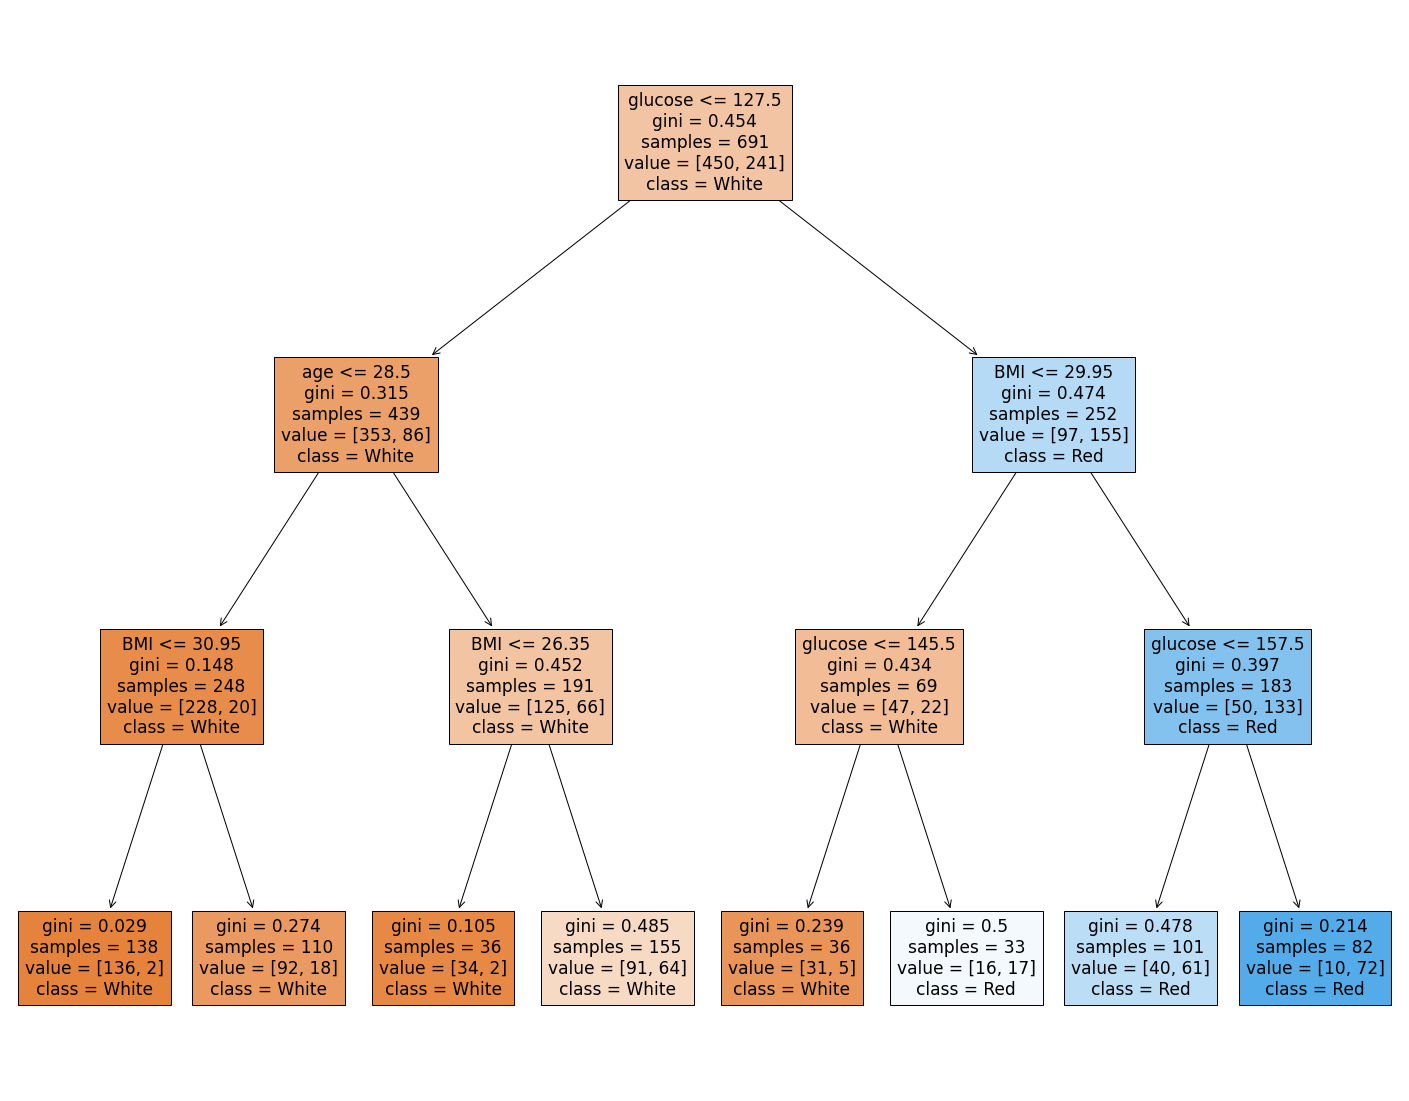

In [103]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=df.columns,
                   class_names=['White', "Red"],
                   filled=True)

Decision Tree in Regression


In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [105]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X_train, Y_train)

In [106]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.95
|   |   |   |--- value: [0.01]
|   |   |--- feature_5 >  30.95
|   |   |   |--- value: [0.16]
|   |--- feature_7 >  28.50
|   |   |--- feature_5 <= 26.35
|   |   |   |--- value: [0.06]
|   |   |--- feature_5 >  26.35
|   |   |   |--- value: [0.41]
|--- feature_1 >  127.50
|   |--- feature_5 <= 29.95
|   |   |--- feature_1 <= 145.50
|   |   |   |--- value: [0.14]
|   |   |--- feature_1 >  145.50
|   |   |   |--- value: [0.52]
|   |--- feature_5 >  29.95
|   |   |--- feature_1 <= 157.50
|   |   |   |--- value: [0.60]
|   |   |--- feature_1 >  157.50
|   |   |   |--- value: [0.88]



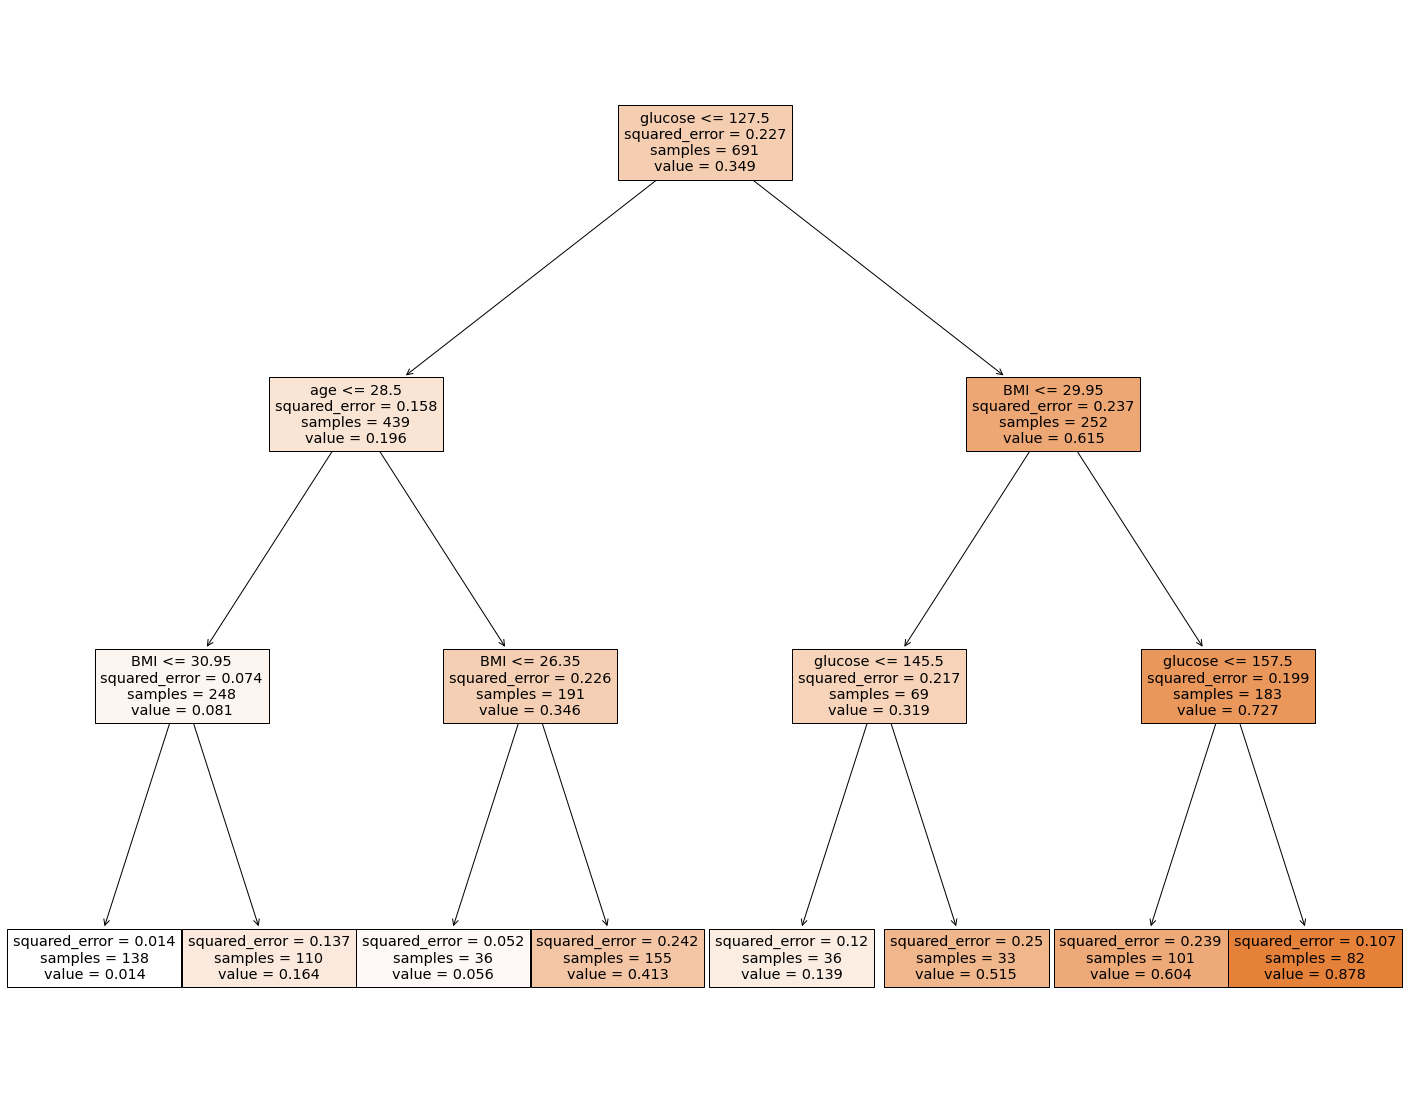

In [107]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=df.columns, filled=True)